# WE RATE DOGS PROJECT

### GATHERING DATA

First of all we are going to gather all three pieces of data we need.

#### 1. The WeRateDogs Twitter archive

This was a file on hand, so we are just now going to upload it and read the data into a Pandas Dataframe.

In [1]:
import pandas as pd

In [2]:
df_wrd = pd.read_csv('twitter-archive-enhanced.csv')
df_wrd.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. The tweet image predictions
This file is hosted on Udacity's servers and will be now downloaded programmatically using the Requests library and the [url provided](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv).

In [3]:
import requests

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)


In [6]:
df_tip = pd.read_csv('image-predictions.tsv', sep="\t")
df_tip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Additional data from the Twitter API
We need to gather each tweet's retweet count and like count.

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
     This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

Now we have the `tweet_json.txt` we can read it line by line into a pandas DataFrame with tweet ID, retweet count and like count.



In [7]:
df_api = pd.read_json('tweet_json.txt', lines=True)
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

There is another way to create a pandas dataframe only with the columns of interest:

In [8]:
columns_api = ['id', 'retweet_count', 'favorite_count']
df_api = df_api[columns_api]
df_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## ASSESSING DATA


### 1. The WeRateDogs Twitter archive


Let's have a visual of the full dataset so we can see quality or structure issues.

In [9]:
df_wrd

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


Now we can explore programmatically the archive.

In [10]:
df_wrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

There are a lot of missing values related to replies and retweeted tweets. There are some missing `expanded_urls` too. Let's explore about the strings so we can assure that there are no more missing values.

In [11]:
df_wrd.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


There are a lot of data types errors here. 

In [12]:
df_wrd.shape[0]

2356

In [13]:
df_wrd['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [14]:
df_wrd.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

It seems that there are some rating numerators much higher than others. We know for sure that it is common to get a 12 or even a 14. But there are some numbers that might be errors so we should check them out.

In [15]:
# Set max_colwidth to None to display full content of text column
pd.set_option('display.max_colwidth', None)

df_wrd[df_wrd['rating_numerator'] > 15]['text']

55                                                                                    @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
188                                                                                        @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189                                         @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
290                                                                                                                                                            @markhoppus 182/10
313                                                                            @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
340                                  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's

So there are not errors at all, but the result of an atypical rating system (because they're good dogs). Indeed, we can see that not every `rating_denominator` is 10 and that is OK.

Also we can see that there are some rows where there are no name for the dogs so it is not possible that the value is different than None.

We can suspect that timestamps are not in datetime format. Let's see.

In [16]:
type(df_wrd['timestamp'][0]), type(df_wrd['retweeted_status_timestamp'][0])

(str, float)

Let's explore about duplicated rows:

In [17]:
df_wrd.duplicated().sum()

0

In [18]:
df_wrd['tweet_id'].duplicated().sum()

0

Now we are going to check the values of the doggo, floofer, pupper and puppo columns.

In [19]:
df_wrd.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
df_wrd.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
df_wrd.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [22]:
df_wrd.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

We can see that there are only two values: None or the name of the column itself.

### 2. The tweet image predictions

In [23]:
df_tip

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [24]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_tip.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
df_tip.shape[0]

2075

We need to know whether there are duplicated rows.

In [27]:
df_tip.duplicated().sum()

0

In [28]:
df_tip['tweet_id'].duplicated().sum()

0

The maximum p1_conf (how confident the algorithm is in its #1 prediction) is 1. We can explore a little more about this.

In [29]:
df_tip['img_num'].unique()

array([1, 4, 2, 3], dtype=int64)

In [30]:
df_tip[df_tip['p1_conf'] == 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


That is indeed a jigsaw puzzle. The dog was very small comparing to the game, so it was not identified.

### 3. Additional data from the Twitter API

In [31]:
df_api

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [32]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [33]:
df_api.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


We need to know whether there are duplicated rows.

In [34]:
df_api.duplicated().sum()

0

In [35]:
df_api.id.duplicated().sum()

0

In [36]:
df_api.shape[0]

2354

It seems that there are different number of rows in each table.

## Quality issues:

### WeRateDogs table
1. Missing values (NaN) in `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`.  We only want original ratings (no retweets or replies) that have images. 
2. Missing values (NaN): 59 `expanded_urls` missing
3. Data format: `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` are integer and floats instead of string. Though they are a number, we do not need them that way because we are not going to make calculations.
4. Data format: `timestamp` and `retweeted_status_timestamp` are not datetime format.

### Image Predictions File
5. Data format: `tweet_id` and `img_num` are integer instead of string. Though they are a number, we do not need them that way because we are not going to make calculations.
6. Missing records: 2075 instead of 2356. We only have the image predictions for tweets until August 1st, 2017.

### API table
7. Column name: `id` should be named `tweet_id` to be the same as in the previous tables.
8. Data format: `id` is integer instead of string. Though it is a number, we do not need it that way because we are not going to make calculations.
9. Missing records: 2354 instead of 2356.


## Tidiness issues:
10. WeRateDogs table contains 2 types of information: about the dog itself and about the tweet. 
11. In WeRateDogs table, `doggo`, `floofer`, `pupper` and `puppo` columns are the same variable.
12. API table contains information about the tweet and that is the same table as the WeRateDogs Twitter archive.
 

## CLEANING DATA

We will start making a copy of the original data before cleaning.

In [37]:
df_wrd_clean = df_wrd.copy()
df_tip_clean = df_tip.copy()
df_api_clean = df_api.copy()

### MISSING VALUES

### Missing values (NaN) in `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`.  
In fact this is not really an issue about missing values but we only want original ratings (no retweets or replies) that have images. So every non-null value in this columns tells us that we do not need that record.

#### Define: 
Eliminate records with values different than NaN in `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, as we only want original ratings (no retweets or replies).

#### Code


In [38]:
df_wrd_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [39]:
#Check the number of the 
df_wrd_clean['in_reply_to_status_id'].notnull().sum()

78

In [40]:
df_wrd_clean = df_wrd_clean[df_wrd_clean['in_reply_to_status_id'].isnull()]

#### Test

In [41]:
df_wrd_clean['in_reply_to_status_id'].notnull().sum()

0

In [42]:
df_wrd_clean['in_reply_to_user_id'].notnull().sum()

0

In [43]:
df_wrd_clean['retweeted_status_id'].notnull().sum() 

181

We can see that there are no more replies but there are still retweets, so we are going to change that.

#### Code

In [44]:
df_wrd_clean = df_wrd_clean[df_wrd_clean['retweeted_status_id'].isnull()]

#### Test

In [45]:
df_wrd_clean['retweeted_status_id'].notnull().sum()

0

In [46]:
df_wrd_clean['retweeted_status_user_id'].notnull().sum()

0

In [47]:
df_wrd_clean['retweeted_status_timestamp'].notnull().sum()

0

In [48]:
df_wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

Now we don't really need those 5 columns so we are going to drop them.

#### Define:
Drop the 5 columns with 0 non-null values.

#### Code:

In [49]:
df_wrd_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)
                

#### Test

In [50]:
df_wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### - Missing values (NaN): 59 expanded_urls missing 
### - Data format: `tweet_id`
Now we can see that we only have missing 3 expanded_urls, but we will need the tweet id in string format to concatenate it to the url.
Regarding data format, we had all these variables with the wrong data format: `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`. Now that we've dropped 4 of them, we only have `tweet_id` to convert to string. That we will need to do before completing the 3 expanded_urls missing values.

#### Define:
Convert `tweet_id` to string.

#### Code

In [51]:
df_wrd_clean['tweet_id'] = df_wrd_clean['tweet_id'].astype(str)

#### Test

In [52]:
type(df_wrd_clean['tweet_id'][0])

str

#### Define:
Complete the 3 expanded_urls missing using the standard format and the tweet id.

#### Code

In [53]:
df_wrd_clean['expanded_urls'] = 'https://twitter.com/dog_rates/status/' + df_wrd_clean['tweet_id']

#### Test

In [54]:
df_wrd_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256,12,10,Franklin,None,None,None,None


In [55]:
df_wrd_clean[df_wrd_clean['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [56]:
df_wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2097 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(2), object(10)
memory usage: 277.5+ KB


Now we have a table with no missing values. Let's clean for tidiness.

### - WeRateDogs table contains 2 types of information.
### - API table contains same information as the WeRateDogs Twitter archive.
### - Columns named `id` instead of `tweet_id`
### - `id` is integer instead of string. 
There are 2 tables here: one about the dog (part of the WeRateDogs table) and the other one with information about the tweet (part of the WeRateDogs table and the API table). We need to split one table into two, but then merge two tables in one. To do this, we first need to convert `id` to string format and rename it as `tweet_id`so we can merge them.

#### Define:
Convert `id` to string.

#### Code






In [57]:
df_api_clean['id'] = df_api_clean['id'].astype(str)

#### Test


In [58]:
type(df_api_clean['id'][0])

str

#### Define: 
Rename `id` as `tweet_id`. 

#### Code

In [59]:
df_api_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [60]:
df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


#### Define: 
Split WeRateDogs table in two: 
- df_dogs: `tweet_id`, `name`, `text`, `rating_numerator`, `rating_denominator`, `doggo`, `floofer`, `pupper`, `puppo`. 
- df_tweet: `tweet_id`, `timestamp`, `ource`, `expanded_urls`

#### Code

In [61]:
df_dogs = df_wrd_clean.loc[:, ['tweet_id', 'name', 'text', 'rating_numerator', 'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo']]
df_tweets = df_wrd_clean.loc[:, ['tweet_id', 'timestamp', 'source', 'expanded_urls']]

#### Test

In [62]:
df_dogs.head()

,tweet_id,name,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
0,892420643555336193,Phineas,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,None,None,None,None
1,892177421306343426,Tilly,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,None,None,None,None
2,891815181378084864,Archie,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,None,None,None,None
3,891689557279858688,Darla,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,None,None,None,None
4,891327558926688256,Franklin,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,None,None,None,None


In [63]:
df_tweets.head()

,tweet_id,timestamp,source,expanded_urls
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/892420643555336193
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/892177421306343426
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/891815181378084864
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/891689557279858688
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/891327558926688256


#### Define: 
Merge API table with df_tweets.

#### Code

In [64]:
df_tweets = pd.merge(df_tweets, df_api_clean, on=['tweet_id'], how = 'left')

#### Test

In [65]:
df_tweets.head()

,tweet_id,timestamp,source,expanded_urls,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/892420643555336193,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/892177421306343426,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/891815181378084864,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/891689557279858688,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/891327558926688256,9774,41048


In [66]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2097 non-null   object
 1   timestamp       2097 non-null   object
 2   source          2097 non-null   object
 3   expanded_urls   2097 non-null   object
 4   retweet_count   2097 non-null   int64 
 5   favorite_count  2097 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 114.7+ KB


### In WeRateDogs table, `doggo`, `floofer`, `pupper` and `puppo` columns are the same variable.



#### Define:
Melt 4 variables in 1 column `stage`.

#### Code

In [67]:
df_dogs['stage'] = df_dogs.text.str.extract('(puppo|pupper|floofer|doggo)', expand=True)
df_dogs[df_dogs['stage'].notnull()].sample(10)

,tweet_id,name,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,stage
300,836753516572119041,Meera,This is Meera. She just heard about taxes and how much a doghouse in a nice area costs. Not pupared to be a doggo anymore. 12/10 https://t.co/GZmNEdyoJY,12,10,doggo,None,None,None,doggo
1936,673956914389192708,one,This is one esteemed pupper. Just graduated college. 10/10 what a champ https://t.co/nyReCVRiyd,10,10,None,None,pupper,None,pupper
1603,685943807276412928,the,This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn,8,10,None,None,pupper,None,pupper
877,760893934457552897,Wishes,This is Wishes. He has the day off. Daily struggles of being a doggo have finally caught up with him. 11/10 https://t.co/H9YgrUkYwa,11,10,doggo,None,None,None,doggo
440,819924195358416896,None,Here we have a doggo who has messed up. He was hoping you wouldn't notice. 11/10 someone help him https://t.co/XdRNXNYD4E,11,10,doggo,None,None,None,doggo
881,760521673607086080,None,"Doggo want what doggo cannot have. Temptation strong, dog stronger. 12/10 https://t.co/IqyTF6qik6",12,10,doggo,None,None,None,doggo
1850,675740360753160193,None,Here's a pupper licking in slow motion. 12/10 please enjoy https://t.co/AUJi8ujxw9,12,10,None,None,pupper,None,pupper
489,813910438903693312,Chubbs,This is Chubbs. He dug a hole and now he's stuck in it. Dang h*ckin doggo. 11/10 would assist https://t.co/z1VRj1cYZf,11,10,doggo,None,None,None,doggo
2015,672205392827572224,Opal,This is Opal. He's a Royal John Coctostan. Ready for transport. Basically indestructible. 9/10 good pupper https://t.co/yRBQF9OS7D,9,10,None,None,pupper,None,pupper
1738,679527802031484928,None,This little pupper just arrived. 11/10 would snug https://t.co/DA5aqnSGfB,11,10,None,None,pupper,None,pupper


In [68]:
(len(df_dogs.query('doggo != "None"')) + len(df_dogs.query('floofer != "None"')) + len(df_dogs.query('pupper != "None"')) + len(df_dogs.query('puppo != "None"'))), df_dogs['stage'].notnull().sum()


(347, 353)

We have collected even more dog stages. Though we could try and extract several stages more, knowing that only a few dogs has their stage, we can stop here. We can drop the original columns and convert dogs stages to categories.

In [69]:
df_dogs['stage'] = df_dogs['stage'].astype('category')

In [70]:
df_dogs.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [71]:
df_dogs['stage'].value_counts()

pupper     240
doggo       80
puppo       29
floofer      4
Name: stage, dtype: int64

In [72]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2097 non-null   object  
 1   name                2097 non-null   object  
 2   text                2097 non-null   object  
 3   rating_numerator    2097 non-null   int64   
 4   rating_denominator  2097 non-null   int64   
 5   stage               353 non-null    category
dtypes: category(1), int64(2), object(3)
memory usage: 165.1+ KB


### Data format: `timestamp` and `retweeted_status_timestamp` are not datetime format.
Now we don't have the `retweeted_status_timestamp` so we don't have that issue anymore.

#### Define: 
Convert `timestamp` to datetime format.

#### Code

In [73]:
df_tweets['timestamp'] = pd.to_datetime(df_tweets['timestamp'])

#### Test

In [74]:
df_tweets.dtypes

tweet_id                       object
timestamp         datetime64[ns, UTC]
source                         object
expanded_urls                  object
retweet_count                   int64
favorite_count                  int64
dtype: object

### `tweet_id` and `img_num` are integer instead of string (prediction table).

Though they are a number, we do not need them that way because we are not going to make calculations.

#### Define: 
Convert `tweet_id` and `img_num` to string. We could convert `img_num` to category but for this project string will do OK.

#### Code

In [75]:
df_tip_clean['tweet_id'] = df_tip_clean['tweet_id'].astype(str)
df_tip_clean['img_num'] = df_tip_clean['img_num'].astype(str)

#### Test

In [76]:
type((df_tip_clean.tweet_id)[0]), type((df_tip_clean.img_num)[0])

(str, str)

### Missing records: 2075 instead of 2356 (predictions table) and 2354 instead of 2356 (API table).
We only have the image predictions for tweets until August 1st, 2017. 
Now we have a different number of rows: we have 2097 in df_tweets and df_dogs, and 2075 in df_tip_clean. 

#### Define: 
Create a new master dataset where we have all data (except for dog stages) for the same tweet_id so we can extract conclusions.

#### Code
First let's have a look to the columns and non-null values in every table.

In [77]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2097 non-null   object             
 1   timestamp       2097 non-null   datetime64[ns, UTC]
 2   source          2097 non-null   object             
 3   expanded_urls   2097 non-null   object             
 4   retweet_count   2097 non-null   int64              
 5   favorite_count  2097 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 114.7+ KB


In [78]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2097 non-null   object  
 1   name                2097 non-null   object  
 2   text                2097 non-null   object  
 3   rating_numerator    2097 non-null   int64   
 4   rating_denominator  2097 non-null   int64   
 5   stage               353 non-null    category
dtypes: category(1), int64(2), object(3)
memory usage: 165.1+ KB


In [79]:
df_tip_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   object 
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), object(6)
memory usage: 152.1+ KB


Now let's merge first df_tweets and df_dogs:

In [80]:
df_tweets_dogs = pd.merge(df_tweets, df_dogs, how='outer', on=['tweet_id'])

#### Test

In [81]:
df_tweets_dogs.head()

,tweet_id,timestamp,source,expanded_urls,retweet_count,favorite_count,name,text,rating_numerator,rating_denominator,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/892420643555336193,8853,39467,Phineas,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/892177421306343426,6514,33819,Tilly,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/891815181378084864,4328,25461,Archie,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/891689557279858688,8964,42908,Darla,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/891327558926688256,9774,41048,Franklin,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,NaN


In [82]:
df_tweets_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   expanded_urls       2097 non-null   object             
 4   retweet_count       2097 non-null   int64              
 5   favorite_count      2097 non-null   int64              
 6   name                2097 non-null   object             
 7   text                2097 non-null   object             
 8   rating_numerator    2097 non-null   int64              
 9   rating_denominator  2097 non-null   int64              
 10  stage               353 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 182.5+ KB


#### Code:

In [83]:
df_master = pd.merge(df_tweets_dogs, df_tip_clean, how='inner', on=['tweet_id'])

#### Test

In [84]:
df_master.head()

,tweet_id,timestamp,source,expanded_urls,retweet_count,favorite_count,name,text,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/892420643555336193,8853,39467,Phineas,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/892177421306343426,6514,33819,Tilly,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/891815181378084864,4328,25461,Archie,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/891689557279858688,8964,42908,Darla,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/891327558926688256,9774,41048,Franklin,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [85]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   expanded_urls       1971 non-null   object             
 4   retweet_count       1971 non-null   int64              
 5   favorite_count      1971 non-null   int64              
 6   name                1971 non-null   object             
 7   text                1971 non-null   object             
 8   rating_numerator    1971 non-null   int64              
 9   rating_denominator  1971 non-null   int64              
 10  stage               322 non-null    category           
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

Now we have complete data (except for stage) for every tweet id. 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [86]:
df_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section I am going to analyze and visualize the wrangled data stored in df_master.

In [87]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We are going to look over the master dataframe so we can think some possible questions to answer.

In [88]:
df_master.sample(10)

,tweet_id,timestamp,source,expanded_urls,retweet_count,favorite_count,name,text,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1906,667171260800061440,2015-11-19 02:43:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/667171260800061440,97,235,Kenneth,Say hello to Kenneth. He likes Reese's Puffs. 10/10 https://t.co/6RHNRsByOY,10,10,...,1,giant_schnauzer,0.841265,True,Lakeland_terrier,0.052744,True,Irish_water_spaniel,0.034402,True
1002,707693576495472641,2016-03-09 22:24:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/707693576495472641,1133,3765,Jiminus,This is Jiminus. He's in a tub for some reason. What a jokester. Smh 7/10 churlish af https://t.co/84L4ED9Tpi,7,10,...,1,bathtub,0.499525,False,tub,0.488014,False,washbasin,0.009298,False
282,827600520311402496,2017-02-03 19:31:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/827600520311402496,1082,8143,Tucker,Meet Tucker. It's his birthday. He's pupset with you because you're too busy playing @GoodDogsGame to celebrate. 13/10 would put down phone https://t.co/vrppizPGdb,13,10,...,1,Pembroke,0.325638,True,golden_retriever,0.317235,True,Labrador_retriever,0.116087,True
623,763837565564780549,2016-08-11 20:40:41+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/763837565564780549,4858,14041,Alfie,This is Alfie. He's touching a butt. Couldn't be happier. 11/10 https://t.co/gx3xF5mZbo,11,10,...,1,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True
425,800388270626521089,2016-11-20 17:20:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/800388270626521089,3265,12456,Doc,This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5,12,10,...,2,golden_retriever,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True
418,801538201127157760,2016-11-23 21:29:33+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/801538201127157760,2391,9141,Wallace,This is Wallace. He'll be your chau-fur this evening. 12/10 eyes on the road Wallace https://t.co/p1RD39XjUe,12,10,...,1,Pembroke,0.550506,True,Cardigan,0.306612,True,Shetland_sheepdog,0.054230,True
983,709042156699303936,2016-03-13 15:43:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/709042156699303936,1864,5197,Klevin,This is Klevin. He's addicted to sandwiches (yes a hotdog is a sandwich fight me) It's tearing his family apart 9/10 https://t.co/7BkkVNu5pd,9,10,...,1,hotdog,0.826579,False,Rottweiler,0.068179,True,Labrador_retriever,0.049218,True
495,787717603741622272,2016-10-16 18:11:26+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/787717603741622272,3240,11416,Tonks,This is Tonks. She is a service puppo. Can hear a caterpillar hiccup from 7 miles away. 13/10 would follow anywhere https://t.co/i622ZbWkUp,13,10,...,3,German_shepherd,0.992339,True,malinois,0.004920,True,kelpie,0.000853,True
1077,700505138482569216,2016-02-19 02:20:14+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/700505138482569216,646,2487,Kaia,This is Kaia. She's just cute as hell. 12/10 I'd kill for Kaia https://t.co/5fMdH8GFaq,12,10,...,1,bath_towel,0.449684,False,Norwegian_elkhound,0.160205,True,Great_Dane,0.048666,True
1843,668286279830867968,2015-11-22 04:33:59+00:00,"<a href=""http://tw

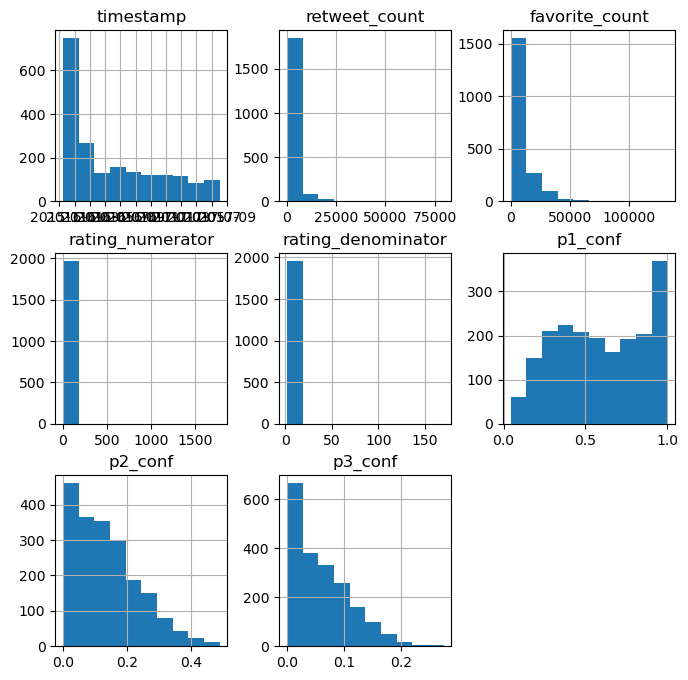

In [89]:
df_master.hist(figsize=(8,8));

### Q1: Is there any relationship between the number of retweets and favorite counts?

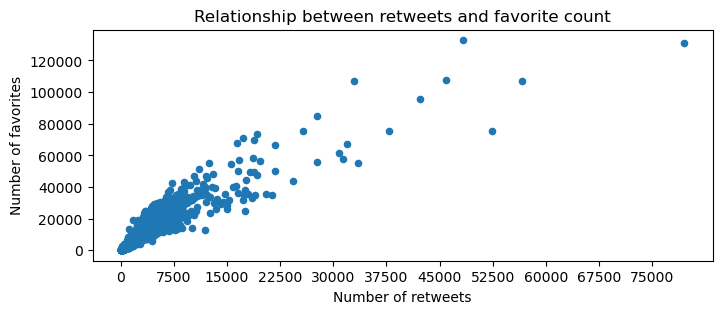

In [90]:
df_master.plot(x = 'retweet_count', y='favorite_count', kind='scatter', figsize=(8,3))
plt.xticks(np.arange(0, 80000, 7500))
plt.title("Relationship between retweets and favorite count")
plt.xlabel("Number of retweets")
plt.ylabel("Number of favorites");

We can see that there is a positive relationship between retweets and favorite count.

### Q2: Is the hour of the day the tweet is published important in order to get more likes and retweets?

In [91]:
#New column with only hour of the day
df_master['hour'] = df_master['timestamp'].dt.hour

In [92]:
#Count of every hour and extract maximum
hour_count = df_master['hour'].value_counts().sort_index()
hour_count

0     249
1     277
2     209
3     164
4      95
5      26
6       3
13      1
14      8
15     90
16    190
17    159
18     99
19     81
20     75
21     69
22     67
23    109
Name: hour, dtype: int64

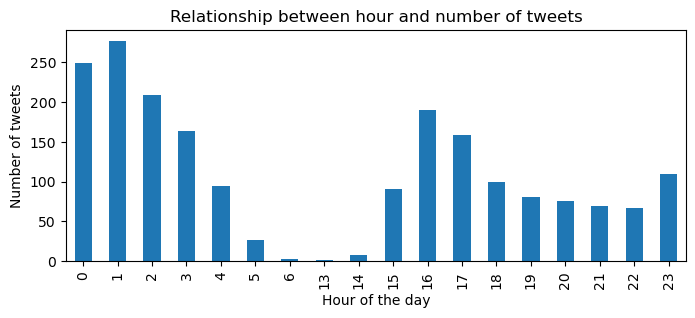

In [93]:
hour_count.plot(x = 'hour', y='number of tweets', kind='bar', figsize=(8,3))
plt.title("Relationship between hour and number of tweets")
plt.xlabel("Hour of the day")
plt.ylabel("Number of tweets");

The most frequent hours of the day to publish tweets was from midnight to 2 a.m. The least frequent are from 5 a.m. to 2 p.m.

In [94]:
#Create a new dataframe where we can see the favorite and retweet count, but also the proportion of favorites and retweets per tweet.
df_fav_ret = pd.DataFrame(df_master.groupby('hour')[['favorite_count', 'retweet_count']].sum())
df_fav_ret['num_tweets'] = pd.DataFrame(df_master['hour'].value_counts()).sort_index()
df_fav_ret['fav_per_tweet'] = df_fav_ret['favorite_count']/df_fav_ret['num_tweets']
df_fav_ret['ret_per_tweet'] = df_fav_ret['retweet_count']/df_fav_ret['num_tweets']
df_fav_ret

,favorite_count,retweet_count,num_tweets,fav_per_tweet,ret_per_tweet
hour,,,,,
0,3425942,959450,249,13758.803213,3853.212851
1,2322296,703491,277,8383.740072,2539.678700
2,1044655,391301,209,4998.349282,1872.253589
3,684338,236672,164,4172.792683,1443.121951
4,331218,121341,95,3486.505263,1277.273684
5,90970,40433,26,3498.846154,1555.115385
6,114389,59236,3,38129.666667,19745.333333
13,749,409,1,749.000000,409.000000
14,37995,11605,8,4749.375000,1450.625000


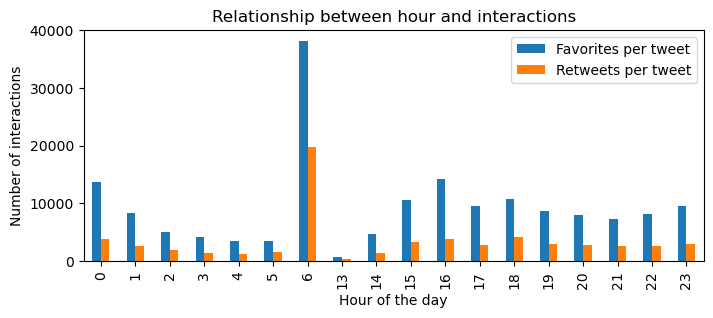

In [95]:
df_fav_ret.plot(y=['fav_per_tweet', 'ret_per_tweet'], kind='bar', figsize=(8,3))
plt.title("Relationship between hour and interactions")
plt.xlabel("Hour of the day")
plt.ylabel("Number of interactions")
plt.legend(['Favorites per tweet', 'Retweets per tweet'])
plt.show()

At 6 a.m. we have an unusual number of interactions. Since the user only tweeted 3 times at 6 a.m., maybe this value is not as informative as the others. Anyway, it might be interesting to explore to tweet at 6 a.m.

Apart from that, maybe midnight and 4 p.m. are the best choices for posting a tweet, as tweets posted at that time tend to get a little more engagement than others.

### Q3: What is the most common dog stage?

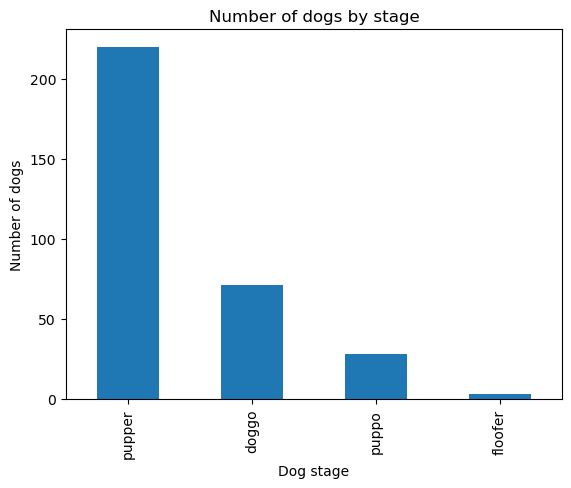

In [96]:
df_master['stage'].value_counts().plot(kind="bar")
plt.title("Number of dogs by stage")
plt.xlabel("Dog stage")
plt.ylabel("Number of dogs")
plt.show()

The most common dog stage is clearly *pupper*. 

### Q4: What are the maximum, minimum and average rating for dogs?

First of all we have to change the rating_denominator for all those values different than 10.h

In [97]:
#Number of rows with a rating_denominator different than 10
df_master[df_master['rating_denominator'] != 10]

,tweet_id,timestamp,source,expanded_urls,retweet_count,favorite_count,name,text,rating_numerator,rating_denominator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,hour
320,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/820690176645140481,3716,13518,None,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,...,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,17
382,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/810984652412424192,1655,5927,Sam,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,...,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,23
658,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/758467244762497024,2539,5316,None,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,...,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,1
794,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/740373189193256964,9220,20648,None,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,...,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,2
842,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/731156023742988288,1434,4196,this,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,...,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,16
884,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/722974582966214656,1764,4493,None,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,...,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,2
918,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/716439118184652801,247,2574,Bluebert,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,...,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,1
939,713900603437621249,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/713900603437621249,829,3062,None,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,...,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,1
963,710658690886586372,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/710658690886586372,636,2529,None,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,...,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,2
981,709198395643068416,2016-03-14 02

In [100]:
df_master['prop_rating_numerator'] = df_master['rating_numerator'] * 10 / df_master['rating_denominator']
df_master[df_master['rating_denominator'] != 10]

,tweet_id,timestamp,source,expanded_urls,retweet_count,favorite_count,name,text,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,hour,prop_rating_numerator
320,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/820690176645140481,3716,13518,None,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,...,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,17,12.000000
382,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/810984652412424192,1655,5927,Sam,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,23,34.285714
658,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/758467244762497024,2539,5316,None,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,...,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,1,11.000000
794,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/740373189193256964,9220,20648,None,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,...,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,2,8.181818
842,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/731156023742988288,1434,4196,this,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,...,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,16,12.000000
884,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/722974582966214656,1764,4493,None,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,...,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,2,2.000000
918,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/716439118184652801,247,2574,Bluebert,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,...,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,1,10.000000
939,713900603437621249,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/713900603437621249,829,3062,None,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,...,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,1,11.000000
963,710658690886586372,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/710658690886586372,636,2529,None,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,...,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,2,10.000000
981,709198395643068416,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/ip

In [101]:
df_master['prop_rating_numerator'].describe()


count    1971.000000
mean       11.694993
std        40.906341
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: prop_rating_numerator, dtype: float64

In [106]:
rating_count = df_master['prop_rating_numerator'].value_counts().sort_index()
rating_count

0.000000         1
1.000000         4
2.000000        10
3.000000        19
4.000000        15
5.000000        34
6.000000        32
6.363636         1
7.000000        51
8.000000        95
8.181818         1
9.000000       150
10.000000      419
11.000000      397
12.000000      450
13.000000      253
14.000000       33
26.000000        1
27.000000        1
34.285714        1
75.000000        1
420.000000       1
1776.000000      1
Name: prop_rating_numerator, dtype: int64

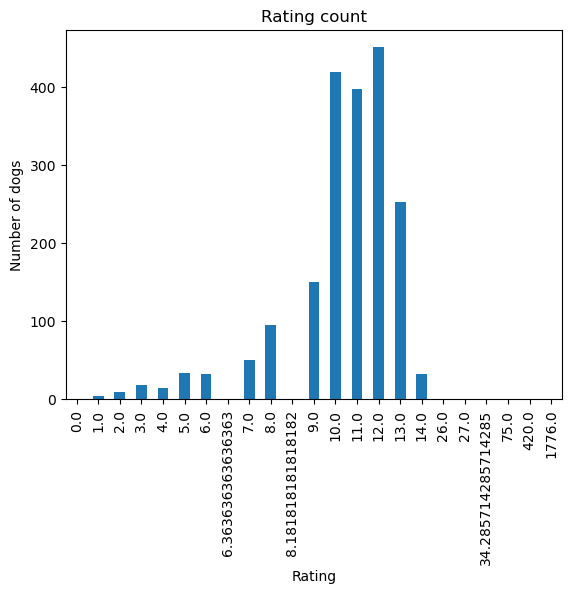

In [110]:
rating_count.plot(kind="bar")
plt.title("Rating count")
plt.xlabel("Rating")
plt.ylabel("Number of dogs")
plt.show()

The minimum rating is 0. The maximum rating is 1776. The average rating is 11.69 and the most frequent is 12.

### Q5: How often is a dog identified as a dog by the image predictions?

In [122]:
num_ident_dog = len(df_master.query('(p1_dog == True) | (p2_dog == True) | (p3_dog == True)'))
num_ident_dog

1666

In [127]:
num_no_dog = len(df_master.query('(p1_dog == False) & (p2_dog == False) & (p3_dog == False)'))
num_no_dog

305

In [126]:
ratio_ident_dog = num_ident_dog / df_master.shape[0]
ratio_ident_dog

0.8452562151192288

In [128]:
ratio_no_dog = num_no_dog / df_master.shape[0]
ratio_no_dog

0.15474378488077117

84'5% of dogs are identified at least once as a dog. The rest of them are not identified as dogs. 

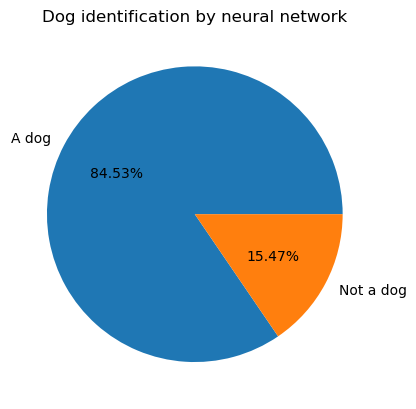

In [136]:
ratios = {'A dog': ratio_ident_dog, 'Not a dog': ratio_no_dog}
ratio_serie = pd.Series(ratios)

ratio_serie.plot(kind="pie", autopct='%.2f%%')
plt.title("Dog identification by neural network")
plt.ylabel('')
plt.show()

### Insights:
1. There is a positive relationship between retweets and favorite count.

2. At 6 a.m. we have an unusual number of interactions. Since the user only tweeted 3 times at 6 a.m., maybe this value is not as informative as the others. Anyway, it might be interesting to explore to tweet at 6 a.m. Apart from that, maybe midnight and 4 p.m. are the best choices for posting a tweet, as tweets posted at that time tend to get a little more engagement than others.

3. The most common dog stage is clearly pupper.

4. The minimum rating is 0. The maximum rating is 1776. The average rating is 11.69 and the most frequent is 12.

5. 84'5% of dogs are identified at least once as a dog. The rest of them are not identified as dogs.